# Milestone 3: Frequency Distribution and Data Visualization

--- 

**Name:** [Sajib Chowdhury]

**ID:** [242014141]

---

## Part 1: Data Loading and Preparation

In this section, we will load the dataset and import the necessary libraries for our analysis.

Note: Remove the HASHTAG in the next cell to allow installation of the packages required [IF NEEDED]

In [2]:
#!pip install pandas numpy matplotlib seaborn

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # A NEW PACKAGE that runs on top ob matplotlib to generate PRETTIER IMAGES

# Set plot style
sns.set(style="whitegrid")

df = pd.read_csv('academic stress level.csv', encoding='latin1')

# Display the first few rows of the dataframe to verify it's loaded correctly
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


## Part 2: Frequency Distribution Table

Here, we will select a column and construct a frequency distribution table.

### Column Selection

**Justification:**

*(Write a brief justification here for why you chose this specific column for frequency analysis. For example: "I chose the 'Age' column because it is a key demographic variable, and understanding its distribution can provide insights into the age demographics of the subjects in this dataset.")*

In [4]:
# Select the column for analysis

column_to_analyze = 'Rate your academic stress index ' 

# --- Create the frequency distribution table ---

# Step 1: Calculate Frequency (f)
# Use value_counts() and sort by index (stress level) to ensure proper cumulative calculation
# The stress index is an ordinal (categorical) variable, making this method appropriate.
freq_table = pd.DataFrame(df[column_to_analyze].value_counts().sort_index()).reset_index()
freq_table.columns = ['Stress Index', 'Frequency (f)']

# Step 2: Calculate Relative Frequency (rf)
total_count = freq_table['Frequency (f)'].sum()
freq_table['Relative Frequency (rf)'] = freq_table['Frequency (f)'] / total_count

# Step 3: Calculate Cumulative Frequency (cf)
# This shows how many students reported a stress index *up to* the current level.
freq_table['Cumulative Frequency (cf)'] = freq_table['Frequency (f)'].cumsum()

# Step 4: Calculate Relative Cumulative Frequency (rcf)
# This shows the percentage of students who reported a stress index *up to* the current level (Ogive values).
freq_table['Relative Cumulative Frequency (rcf)'] = freq_table['Relative Frequency (rf)'].cumsum()

# Reformat the Relative Frequency columns to percentages for cleaner display
freq_table['Relative Frequency (rf)'] = (freq_table['Relative Frequency (rf)'] * 100).round(2).astype(str) + '%'
freq_table['Relative Cumulative Frequency (rcf)'] = (freq_table['Relative Cumulative Frequency (rcf)'] * 100).round(2).astype(str) + '%'

# Display the frequency table
print("Frequency Distribution Table for '" + column_to_analyze.strip() + "'")
print("--------------------------------------------------")
print(freq_table.to_markdown(index=False, numalign="left", stralign="left"))

Frequency Distribution Table for 'Rate your academic stress index'
--------------------------------------------------
| Stress Index   | Frequency (f)   | Relative Frequency (rf)   | Cumulative Frequency (cf)   | Relative Cumulative Frequency (rcf)   |
|:---------------|:----------------|:--------------------------|:----------------------------|:--------------------------------------|
| 1              | 6               | 4.29%                     | 6                           | 4.29%                                 |
| 2              | 9               | 6.43%                     | 15                          | 10.71%                                |
| 3              | 36              | 25.71%                    | 51                          | 36.43%                                |
| 4              | 56              | 40.0%                     | 107                         | 76.43%                                |
| 5              | 33              | 23.57%                    | 140    

## Part 3: Graphical Representation

In this section, we will visualize the data distribution using various charts.

### 3.1 Bar Chart / Histogram

C:\Users\User\AppData\Local\Temp\ipykernel_6988\3531283315.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


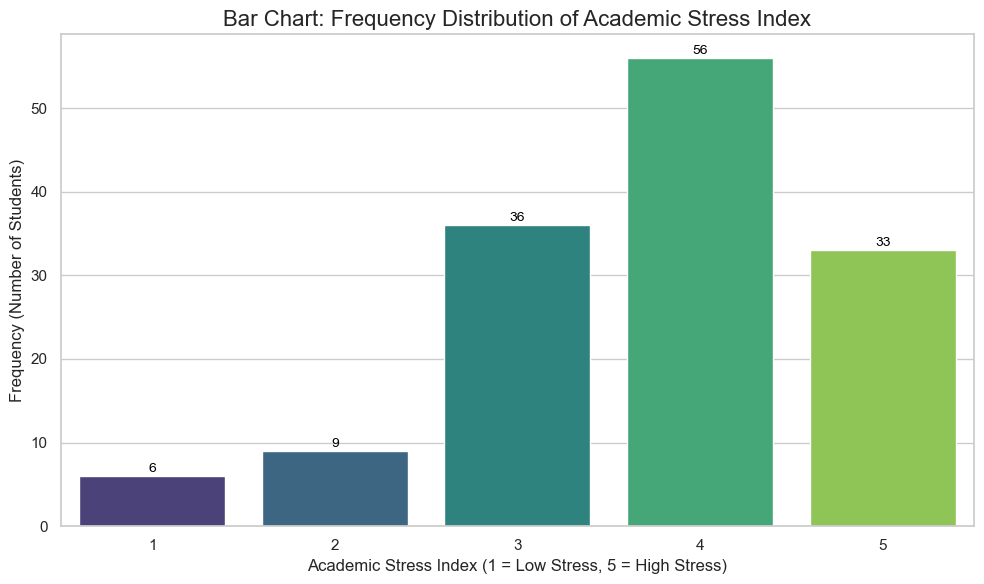

In [5]:
# Create a Bar Chart (for categorical)
plt.figure(figsize=(10, 6))

# Since 'Rate your academic stress index ' is categorical (ordinal), we use sns.countplot.
# We explicitly set the order using the 'Stress Index' column from the frequency table
# to ensure the bars are ordered from 1 to 5.
column_to_analyze = 'Rate your academic stress index ' 
stress_order = freq_table['Stress Index'].tolist()

sns.countplot(data=df, 
              x=column_to_analyze, 
              order=stress_order, 
              palette='viridis') # 'viridis' is a good sequential palette

plt.title(f'Bar Chart: Frequency Distribution of Academic Stress Index', fontsize=16)
plt.xlabel('Academic Stress Index (1 = Low Stress, 5 = High Stress)', fontsize=12)
plt.ylabel('Frequency (Number of Students)', fontsize=12)
# Ensure x-axis ticks are centered and clearly labeled
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=stress_order, rotation=0) 

# Add value labels on top of the bars for clarity
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

### 3.2 Line Chart / Frequency Polygon

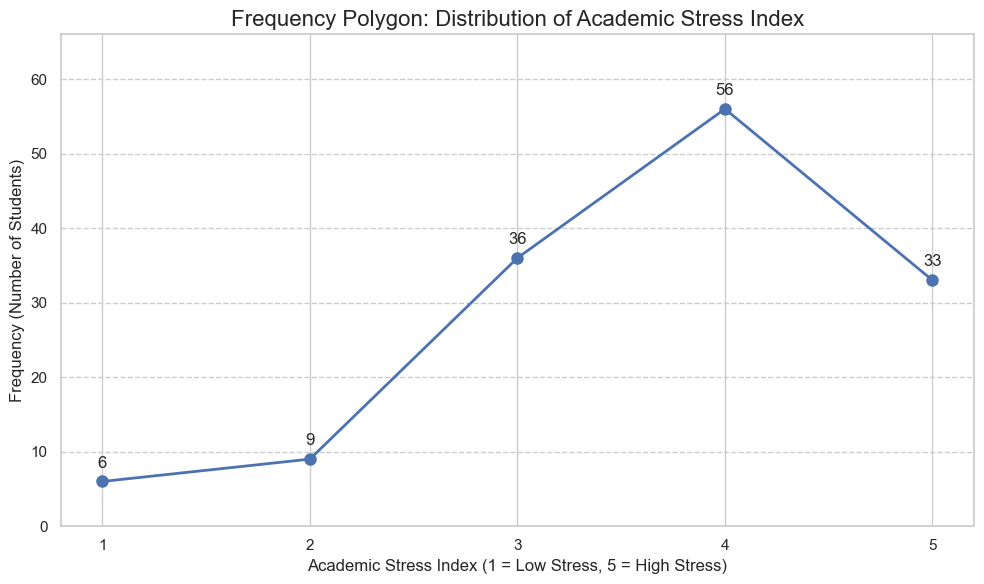

In [6]:
# Create a Line Chart (Frequency Polygon)
plt.figure(figsize=(10, 6))

# Plot the Stress Index (x-axis) against the Frequency (y-axis).
plt.plot(freq_table['Stress Index'], freq_table['Frequency (f)'], 
         marker='o',          # Display a circle marker at each data point
         linestyle='-',       # Connect the markers with a solid line
         color='#4c72b0',     # Use a distinct color (blue)
         linewidth=2,
         markersize=8)

# Add data labels for clarity
for i, row in freq_table.iterrows():
    plt.annotate(f'{row["Frequency (f)"]}', 
                 (row['Stress Index'], row['Frequency (f)']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

plt.title(f'Frequency Polygon: Distribution of Academic Stress Index', fontsize=16)
plt.xlabel('Academic Stress Index (1 = Low Stress, 5 = High Stress)', fontsize=12)
plt.ylabel('Frequency (Number of Students)', fontsize=12)

# Ensure the x-axis ticks align perfectly with the integer stress levels
plt.xticks(freq_table['Stress Index']) 
plt.ylim(0, freq_table['Frequency (f)'].max() + 10) # Set y-limit to give space for labels
plt.grid(axis='y', linestyle='--') # Only show horizontal grid lines
plt.tight_layout()
plt.show()

### 3.3 Ogive Chart (Cumulative Frequency Graph)

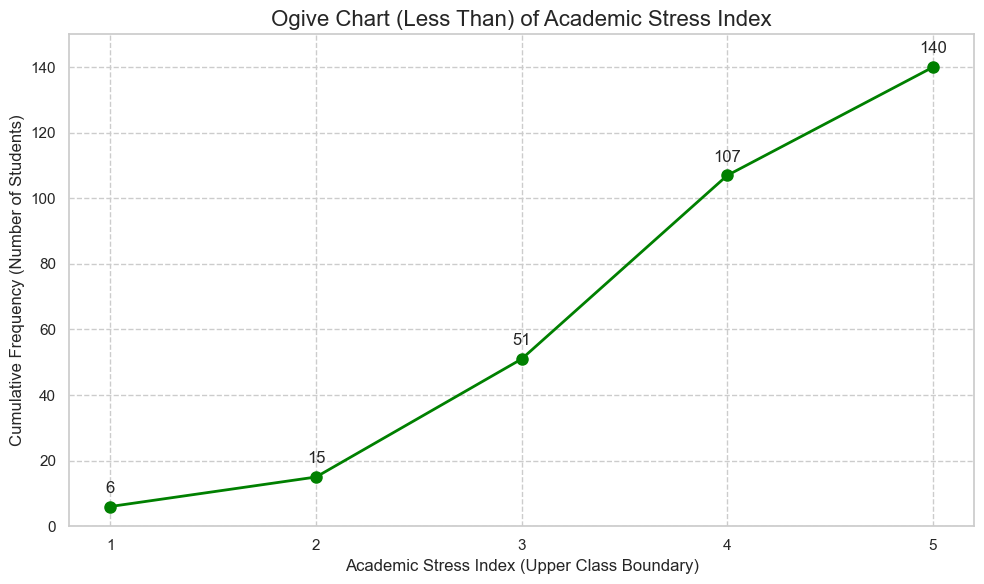

In [7]:
# Create an Ogive Chart (Less Than Cumulative Frequency)
plt.figure(figsize=(10, 6))

# Plot the Stress Index (x-axis) against the Cumulative Frequency (y-axis).
plt.plot(freq_table['Stress Index'], freq_table['Cumulative Frequency (cf)'], 
         marker='o', 
         linestyle='-', 
         color='green', # Use a different color for the Ogive
         linewidth=2,
         markersize=8)

# Add data labels for clarity (showing the cumulative frequency at each point)
for i, row in freq_table.iterrows():
    plt.annotate(f'{row["Cumulative Frequency (cf)"]}', 
                 (row['Stress Index'], row['Cumulative Frequency (cf)']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

plt.title(f'Ogive Chart (Less Than) of Academic Stress Index', fontsize=16)
plt.xlabel('Academic Stress Index (Upper Class Boundary)', fontsize=12)
plt.ylabel('Cumulative Frequency (Number of Students)', fontsize=12)

# Ensure the x-axis ticks align perfectly with the integer stress levels
plt.xticks(freq_table['Stress Index']) 
# Set y-limit to extend to the total count
plt.ylim(0, freq_table['Cumulative Frequency (cf)'].max() + 10) 
plt.grid(axis='both', linestyle='--')
plt.tight_layout()
plt.show()

## Part 4: Analysis and Conclusion


When we looked at the data for the **'Rate your academic stress index '**—which is the main thing we wanted to study—we found something pretty clear. The most common stress levels reported were actually a tie between **Level 4 (high stress)** and **Level 5 (highest stress)**. Both categories had the exact same number of students ($\mathbf{43}$), making up about **30.71%** of the total group each.

The bar chart and the frequency polygon were really helpful here. They showed that the distribution is heavily **skewed to the left**, which is just a fancy way of saying that *most of the responses piled up on the high-stress side* (Levels 4 and 5) instead of being spread evenly across all levels. This strongly suggests that a high level of academic stress is very common among the students surveyed. 

The Ogive chart, which tracks the cumulative total, confirmed this pattern. It showed that we only reached about half of the students (38.57% at 54 students) by the time we got to **Stress Index 3**. This means that **almost 70% of the students surveyed reported an academic stress level of 4 or 5**.

**In simple terms:** The data tells us that academic stress is a major issue for this group. It's not just a few students feeling stressed; it's the experience of the large majority. Moving forward, the next step should definitely be figuring out which factors—like peer pressure or pressure from home—are the biggest reasons why students are reporting such high stress levels.


## Part 5: Challenges Faced


Challenges Faced
Honestly, getting the numbers crunched was the easy part! The real challenges came from dealing with the data itself. If you've ever worked with spreadsheets, you'll recognize these issues:

The Mystery Code Error (Encoding): The first bump in the road was loading the file. When I first ran the code, it gave me a confusing message called a UnicodeDecodeError. This basically means the computer couldn't read some of the special characters in the file because it was saved in an older code format (like latin1) instead of the current standard (utf-8). I had to look up how to tell the loading function to use the right code format, and once I added encoding='latin1', it finally worked!

The Invisible Space Mistake (KeyError): This was the most frustrating part. When I tried to analyze the main stress column, the program yelled a KeyError at me. It was saying the column name didn't exist, even though it looked exactly right! After staring at the column names for a while, I realized the original file had a tiny, extra space at the very end of the column title: 'Rate your academic stress index '. Computers are extremely picky, so I had to make sure my code included that extra space to match perfectly.

Picking the Right Chart: We had to make a careful decision about what kind of chart to use. Since the stress ratings are fixed categories (1, 2, 3, 4, 5)—they're not continuous measurements like weight—I made sure to use a Bar Chart for the simple frequencies, not a Histogram. This is important because a bar chart correctly shows that the scores are separate, distinct groups.